# Worksheet 02

Name:  Quan Ho
UID: U17207751

### Topics

- Effective Programming

### Effective Programming

a) What is a drawback of the top down approach?

It is less adaptable to change and thefore more difficulte to communicate between group members

b) What is a drawback of the bottom up approach?

There is a lack of overall design and integreation complexity whhen the components are being built.

c) What are 3 things you can do to have a better debugging experience?

Ask collabrotes, logging, test units and making simple code

d) (Optional) Follow along with the live coding. You can write your code here:

## Exercise

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Complete the code below to read in a filepath to the `train.csv` and returns the DataFrame.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
df = pd.read_csv('train.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Complete the code so it returns the number of rows that have at least one empty column value

In [2]:
print("There are " + str(len(df[df.isnull().any(axis=1)])) + " rows with at least one empty value.")

There are 708 rows with at least one empty value.


c) Complete the code below to remove all columns with more than 200 NaN values

In [3]:
df = df.dropna(axis=1, thresh=len(df) - 200)
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


d) Complete the code below to replaces `male` with 0 and `female` with 1

In [4]:
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e) Complete the code below to add four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column.

For example: `Braund, Mr. Owen Harris` would be:

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

Anything not clearly one of the above 4 categories can be ignored.

In [5]:
name_pattern = r'(?P<Title>\w+)\.\s*(?P<First_Name>\w+)\s*(?P<Middle_Name>\w+)?\s*(?P<Last_Name>\w+)'
df[['First Name', 'Middle Name', 'Last Name', 'Title']] = df['Name'].str.extract(name_pattern)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Mr,Owen,Harri,s
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Mrs,John,Bradle,y
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Lain,NaN,a
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Mrs,Jacques,Heat,h
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Mr,William,Henr,y


f) Complete the code below to replace all missing ages with the average age

In [6]:
average_age = df['Age'].mean()
empty_age_values = df['Age'].isnull()
num_empty_values = empty_age_values.sum()

df['Age'].fillna(df['Age'].mean(), inplace=True) #Put this after empty age or else it would not count the empty cells correctly
print(f"{num_empty_values} empty age cells were replaced with the average age of {average_age}")
df.head(10)

177 empty age cells were replaced with the average age of 29.69911764705882


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S,Mr,Owen,Harri,s
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C,Mrs,John,Bradle,y
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss,Lain,NaN,a
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S,Mrs,Jacques,Heat,h
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S,Mr,William,Henr,y
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,Q,Mr,Jame,NaN,s
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,S,Mr,Timothy,NaN,J
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,S,Master,Gosta,Leonar,d
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,S,Mrs,Oscar,NaN,W
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,C,Mrs,Nichola,NaN,s


g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe.

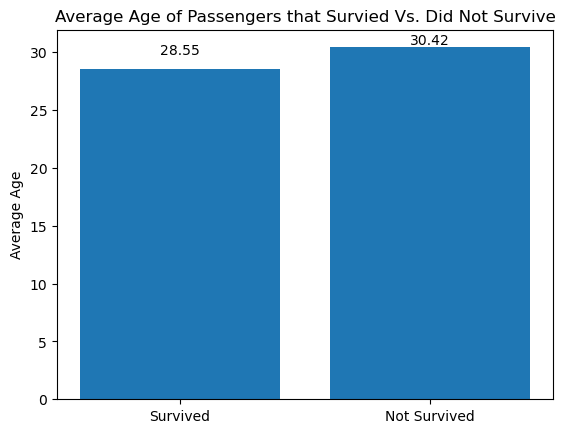

<Figure size 1000x1000 with 0 Axes>

In [14]:
average_age_survived = df[df['Survived'] == 1]['Age'].mean()
average_age_not_survived = df[df['Survived'] == 0]['Age'].mean()

#Plot
plt.bar(['Survived', 'Not Survived'], [average_age_survived, average_age_not_survived])
plt.ylabel('Average Age')
plt.title('Average Age of Passengers that Survied Vs. Did Not Survive')
plt.text(0, average_age_survived + 1, f'{average_age_survived:.2f}', ha='center', va='bottom')
plt.text(1, average_age_not_survived , f'{average_age_not_survived:.2f}', ha='center', va='bottom')
plt.figure(figsize=(10, 10))
plt.show()